# Transfer Learning
Transfer learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.In this tutorial first we will train the model with the simple architecture and then apply transfer learning technique so that we can clearly make out the impact/usefullness of transfer kearning.Here we have performed transfer learning using 1) VGG 16 2) VGG 19 3) Mobilenet
## Applying Transfer Learning Technique to Mnist 
### Importing the required libraries

In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
print("DONE")

## Loading the Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("DONE")

4423680/4422102 [==============================] - 0s 0us/step
DONE


## Data Preprocessing

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
x_train /= 255 #inputs have to be between [0, 1]
x_test /= 255
print("DONE")

DONE


In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("DONE")

DONE


## Building the Model

In [6]:
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(32, (3, 3) ,input_shape=(28,28,1))) #apply 32 filters size of (3, 3) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
#2nd convolution layer
model.add(Conv2D(64,(3, 3))) #apply 64 filters size of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
 
# Fully connected layer. 1 hidden layer consisting of 512 nodes
model.add(Dense(512))
model.add(Activation('relu'))
 
#10 outputs
model.add(Dense(10, activation='softmax'))
print("DONE")

DONE


In [7]:
model.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [8]:
batch_size = 250
epochs = 10
print("DONE")

DONE


In [9]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
print("DONE")

DONE


## Compiling and fitting the Model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
 
hist = model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs, validation_data=(x_test, y_test))

print("DONE")

Epoch 1/10
250/250 [==============================] - 6s 24ms/step - loss: 0.5530 - acc: 0.8021 - val_loss: 0.4037 - val_acc: 0.8575
Epoch 2/10
250/250 [==============================] - 5s 18ms/step - loss: 0.3527 - acc: 0.8735 - val_loss: 0.3386 - val_acc: 0.8791
Epoch 3/10
250/250 [==============================] - 5s 18ms/step - loss: 0.3037 - acc: 0.8906 - val_loss: 0.3426 - val_acc: 0.8693
Epoch 4/10
250/250 [==============================] - 5s 18ms/step - loss: 0.2744 - acc: 0.9004 - val_loss: 0.2978 - val_acc: 0.8925
Epoch 5/10
 19/250 [=>............................] - ETA: 4s - loss: 0.2525 - acc: 0.9051

250/250 [==============================] - 5s 18ms/step - loss: 0.2476 - acc: 0.9085 - val_loss: 0.2721 - val_acc: 0.9026
Epoch 6/10
250/250 [==============================] - 5s 18ms/step - loss: 0.2308 - acc: 0.9163 - val_loss: 0.2600 - val_acc: 0.9057
Epoch 7/10
250/250 [==============================] - 5s 18ms/step - loss: 0.2077 - acc: 0.9229 - val_loss: 0.2529 - val_acc: 0.9064
Epoch 8/10
250/250 [==============================] - 5s 18ms/step - loss: 0.1905 - acc: 0.9304 - val_loss: 0.2648 - val_acc: 0.9044
Epoch 9/10
 42/250 [====>.........................] - ETA: 3s - loss: 0.1885 - acc: 0.9314

250/250 [==============================] - 5s 18ms/step - loss: 0.1785 - acc: 0.9341 - val_loss: 0.2436 - val_acc: 0.9133
Epoch 10/10
250/250 [==============================] - 5s 18ms/step - loss: 0.1655 - acc: 0.9400 - val_loss: 0.2507 - val_acc: 0.9096
DONE


## Graph

1.   Training accuracy vs Validation accuracy
2.   Training loss vs Validation loss





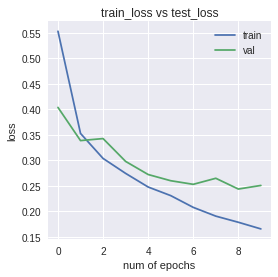

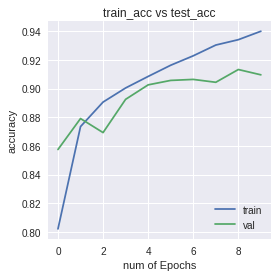

In [11]:
# Graph losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs)

##############################################
plt.figure(1,figsize=(4,4))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)

plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs test_loss')

plt.grid(True)
plt.legend(['train','val']) 

##################################################

plt.figure(2,figsize=(4,4))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs test_acc')

plt.grid(True)
plt.legend(['train','val'],loc=4)


# VGG 16 Model

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()
print("DONE")

DONE


In [14]:
vgg16_model.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
type(vgg16_model)

keras.engine.training.Model

## Converting the VGG 16 Model to Sequential

In [16]:
model1= Sequential()
for layer in vgg16_model.layers:
    model1.add(layer)
print("DONE")

DONE


In [17]:
model1.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Removing the last layer
VGG 16 is trained on Imagenet dataset which consist of 1000 classes,  Since our dataset consist of only 10 classes (Mnist), We remove last classification layer which is meant for classifying 1000 and replace it by the classification layer which is having only 10 classes.

In [0]:
model1.layers.pop()
print("DONE")

DONE


In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Freezing
We keep the weights of rest of the layers as it is, and we train only the classification layer.

In [18]:
for layer in model1.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False
print("DONE")

DONE


# Adding the classification Layer
We add the classification layer to fit into our problem. In case of MNIST we add classification layer with  classes.

In [19]:
model1.add(Dense(10, activation='softmax'))
print("DoNE")

DoNE


In [20]:
model1.summary()
print('DONE')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [23]:
epochs1 = 5
print("DONE")

DONE


# Compile and Fit the Model

In [24]:
model1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
 
hist = model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs1, validation_data=(x_test, y_test))

print("DONE")

Epoch 1/5
250/250 [==============================] - 5s 18ms/step - loss: 0.1080 - acc: 0.9595 - val_loss: 0.2721 - val_acc: 0.9121
Epoch 2/5
250/250 [==============================] - 5s 19ms/step - loss: 0.0993 - acc: 0.9639 - val_loss: 0.2684 - val_acc: 0.9151
Epoch 3/5
250/250 [==============================] - 5s 19ms/step - loss: 0.0897 - acc: 0.9672 - val_loss: 0.2996 - val_acc: 0.9062
Epoch 4/5
250/250 [==============================] - 5s 19ms/step - loss: 0.0799 - acc: 0.9706 - val_loss: 0.2938 - val_acc: 0.9110
Epoch 5/5
 22/250 [=>............................] - ETA: 4s - loss: 0.0659 - acc: 0.9775

250/250 [==============================] - 5s 19ms/step - loss: 0.0729 - acc: 0.9743 - val_loss: 0.3003 - val_acc: 0.9140
DONE


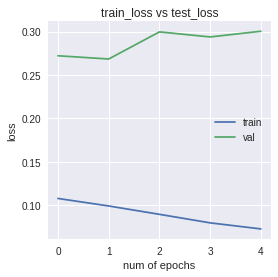

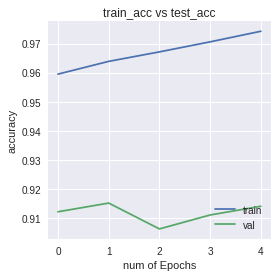

In [25]:
# Graph losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs1)

##############################################
plt.figure(1,figsize=(4,4))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)

plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs test_loss')

plt.grid(True)
plt.legend(['train','val']) 

##################################################

plt.figure(2,figsize=(4,4))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs test_acc')

plt.grid(True)
plt.legend(['train','val'],loc=4)


 # VGG 19 Model

In [26]:
vgg19_model = keras.applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
print("DONE")

574717952/574710816 [==============================] - 20s 0us/step
DONE


In [27]:
vgg19_model.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [28]:
type(vgg19_model)
#print("DONE")

keras.engine.training.Model

## Converting the VGG 19 Model to Sequential

In [29]:
model2= Sequential()
for layer in vgg19_model.layers:
    model2.add(layer)
print("DONE")

DONE


In [30]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Removing the last layer
VGG 16 is trained on Imagenet dataset which consist of 1000 classes,  Since our dataset consist of only 10 classes (Mnist), We remove last classification layer which is meant for classifying 1000 and replace it by the classification layer which is having only 10 classes.

In [31]:
model2.layers.pop()
print("DONE")

DONE


In [32]:
model2.summary()
print("DOne")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Freezing
We keep the weights of rest of the layers as it is, and we train only the classification layer.

In [33]:
for layer in model1.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False
print("DONE")

DONE


# Adding the classification Layer
We add the classification layer to fit into our problem. In case of MNIST we add classification layer with  classes.

In [34]:
model2.add(Dense(10, activation='softmax'))
print("DoNE")

DoNE


In [35]:
model2.summary()
print('DONE')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [38]:
epochs2 = 3
print("DONE")

DONE


# Compile and Fit the Model

In [39]:
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
 
hist = model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs2, validation_data=(x_test, y_test))

print("DONE")

Epoch 1/3
250/250 [==============================] - 5s 19ms/step - loss: 0.0617 - acc: 0.9777 - val_loss: 0.3193 - val_acc: 0.9103
Epoch 2/3
250/250 [==============================] - 5s 19ms/step - loss: 0.0546 - acc: 0.9804 - val_loss: 0.3150 - val_acc: 0.9166
Epoch 3/3
250/250 [==============================] - 5s 19ms/step - loss: 0.0536 - acc: 0.9804 - val_loss: 0.3254 - val_acc: 0.9144
DONE


## Graph

1.   Training accuracy vs Validation accuracy
2.   Training loss vs Validation loss





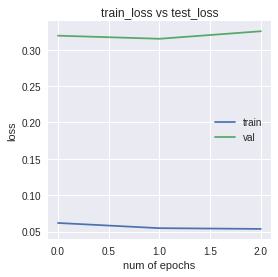

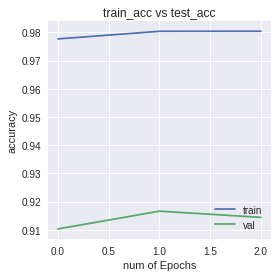

In [40]:
# Graph losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs2)

##############################################
plt.figure(1,figsize=(4,4))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)

plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs test_loss')

plt.grid(True)
plt.legend(['train','val']) 

##################################################

plt.figure(2,figsize=(4,4))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs test_acc')

plt.grid(True)
plt.legend(['train','val'],loc=4)

# MobileNet Model

In [41]:
mobilenet_model = keras.applications.mobilenet.MobileNet()
print("DONE")

17227776/17225924 [==============================] - 4s 0us/step
DONE


In [42]:
mobilenet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [43]:
type(mobilenet_model)
#print("DONE")

keras.engine.training.Model

## Converting MobileNet Model to Sequential()

In [44]:
model3= Sequential()
for layer in mobilenet_model.layers:
    model3.add(layer)
print("DONE")

DONE


In [45]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

## Removing the Last layer of MobileNet Model

In [46]:
model3.layers.pop()
print("DONE")

DONE


In [47]:
model3.summary()
print("DOne")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

## Freezing
We keep the weights of rest of the layers as it is, and we train only the classification layer.


In [48]:
for layer in model3.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False
print("DONE")

DONE


## Adding the classification layer
We add the classification layer to fit into our problem. In case of Fashion_MNIST we add classification layer with classes.

In [49]:
model3.add(Dense(10, activation='softmax'))
print("DoNE")

DoNE


In [50]:
model3.summary()
print('DONE')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [51]:
epochs3 = 5
print("DONE")

DONE


## Compile and Fit the Model

In [52]:
model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
 
hist = model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs3, validation_data=(x_test, y_test))

print("DONE")

Epoch 1/5
250/250 [==============================] - 6s 25ms/step - loss: 0.0422 - acc: 0.9852 - val_loss: 0.3503 - val_acc: 0.9134
Epoch 2/5
250/250 [==============================] - 5s 22ms/step - loss: 0.0335 - acc: 0.9887 - val_loss: 0.3861 - val_acc: 0.9090
Epoch 3/5
250/250 [==============================] - 5s 22ms/step - loss: 0.0325 - acc: 0.9890 - val_loss: 0.3761 - val_acc: 0.9145
Epoch 4/5
250/250 [==============================] - 5s 22ms/step - loss: 0.0299 - acc: 0.9898 - val_loss: 0.3792 - val_acc: 0.9172
Epoch 5/5
  7/250 [..............................] - ETA: 5s - loss: 0.0241 - acc: 0.9891

250/250 [==============================] - 5s 22ms/step - loss: 0.0286 - acc: 0.9902 - val_loss: 0.3956 - val_acc: 0.9152
DONE


## Graph
#### Training accuracy vs Validation accuracy
#### Training loss vs Validation loss

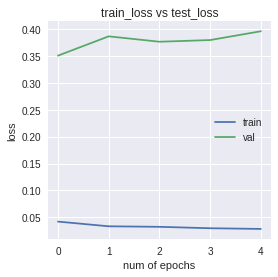

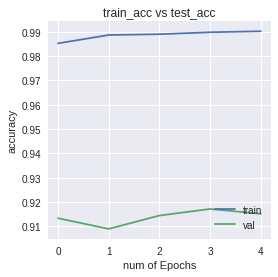

In [54]:
# Graph losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs3)

##############################################
plt.figure(1,figsize=(4,4))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)

plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs test_loss')

plt.grid(True)
plt.legend(['train','val']) 

##################################################

plt.figure(2,figsize=(4,4))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs test_acc')

plt.grid(True)
plt.legend(['train','val'],loc=4)